# Lab-3.2: Non-linear
Author: Dr. Purna Gamage

**Instructions**

* Read and complete all exercises below in the provided `.rmd` notebook 
<!-- click here to download the notebook for the assignment --> 

**Submission:**

* You need to upload ONE document to Canvas when you are done. 
* A PDF (or HTML) of the completed form of this notebook
* The final uploaded version should NOT have any code-errors present. 
* All outputs must be visible in the uploaded version, including code-cell outputs, images, graphs, etc

In [1]:
library(ISLR)
library(gam)
library(splines)
library(tidyverse)
library(caret)

Warning message:
"package 'ISLR' was built under R version 4.2.2"
Warning message:
"package 'gam' was built under R version 4.2.2"
Loading required package: splines

Loading required package: foreach

Loaded gam 1.22-1


Warning message:
"package 'tidyverse' was built under R version 4.2.2"
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
Warning message:
"package 'ggplot2' was built under R version 4.2.2"
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::accumulate() masks foreach::accumulate()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()
✖ purrr::when()       masks foreach::when()
Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift




# Part-1: Demonstration

## Polynomial Regression

### Example 1

Make a sequence of x values to build model matrices.
Also make a nonlinear response variable and store everything in a data frame.

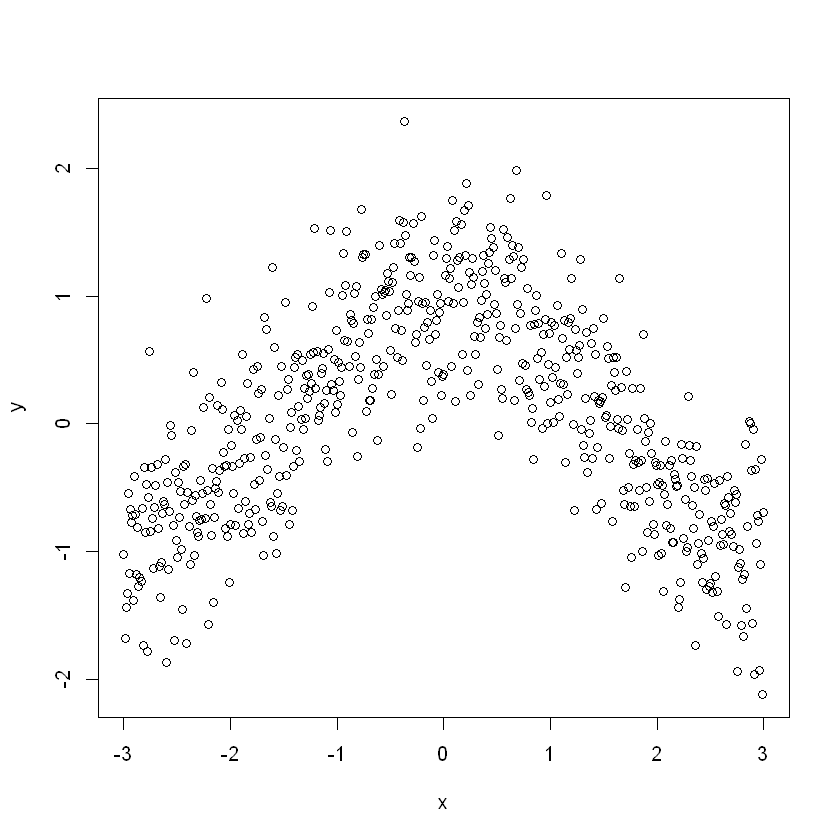

In [2]:
x = seq(-3,3,by=.01) #random numbers
y = cos(x) + rnorm(length(x))/2 #non-linear function
mydf = data.frame(x = x, y = y)
plot(mydf)

Make the model matrix for simple linear regression.

In [3]:
X1 = model.matrix(y ~ x) #create a design matrix
print(head(X1))

  (Intercept)     x
1           1 -3.00
2           1 -2.99
3           1 -2.98
4           1 -2.97
5           1 -2.96
6           1 -2.95


Make a model matrix for polynomial regression.
The basis functions are the powers of the X variable.

In [4]:
X6 = model.matrix(y ~ x + I(x^2) + I(x^3) + I(x^4) + I(x^5) + I(x^6))
print(head(X6))

  (Intercept)     x I(x^2)    I(x^3)   I(x^4)    I(x^5)   I(x^6)
1           1 -3.00 9.0000 -27.00000 81.00000 -243.0000 729.0000
2           1 -2.99 8.9401 -26.73090 79.92539 -238.9769 714.5410
3           1 -2.98 8.8804 -26.46359 78.86150 -235.0073 700.3217
4           1 -2.97 8.8209 -26.19807 77.80828 -231.0906 686.3390
5           1 -2.96 8.7616 -25.93434 76.76563 -227.2263 672.5898
6           1 -2.95 8.7025 -25.67238 75.73351 -223.4138 659.0708


Also make a similar model matrix using the poly() function.
This also makes basis functions which are polynomials of increasing degree.
However, these basis functions have better numerical and statistical properties as we will see shortly.

In [7]:
X6p = model.matrix(y ~ poly(x,6))
print(head(X6))
print(head(X6p)) #values are different

  (Intercept)     x I(x^2)    I(x^3)   I(x^4)    I(x^5)   I(x^6)
1           1 -3.00 9.0000 -27.00000 81.00000 -243.0000 729.0000
2           1 -2.99 8.9401 -26.73090 79.92539 -238.9769 714.5410
3           1 -2.98 8.8804 -26.46359 78.86150 -235.0073 700.3217
4           1 -2.97 8.8209 -26.19807 77.80828 -231.0906 686.3390
5           1 -2.96 8.7616 -25.93434 76.76563 -227.2263 672.5898
6           1 -2.95 8.7025 -25.67238 75.73351 -223.4138 659.0708
  (Intercept) poly(x, 6)1 poly(x, 6)2 poly(x, 6)3 poly(x, 6)4 poly(x, 6)5
1           1 -0.07053437  0.09075695 -0.10685037   0.1203532  -0.1319531
2           1 -0.07029925  0.08984938 -0.10471337   0.1163415  -0.1253555
3           1 -0.07006414  0.08894484 -0.10259420   0.1123900  -0.1189120
4           1 -0.06982902  0.08804333 -0.10049281   0.1084983  -0.1126207
5           1 -0.06959391  0.08714486 -0.09840913   0.1046659  -0.1064795
6           1 -0.06935879  0.08624941 -0.09634312   0.1008924  -0.1004863
  poly(x, 6)6
1  0.14202315

Make a plot of the basis functions x, x^2, ..., x^6.
Since these values are fairly large near the ends of the interval, we need a large ylim.

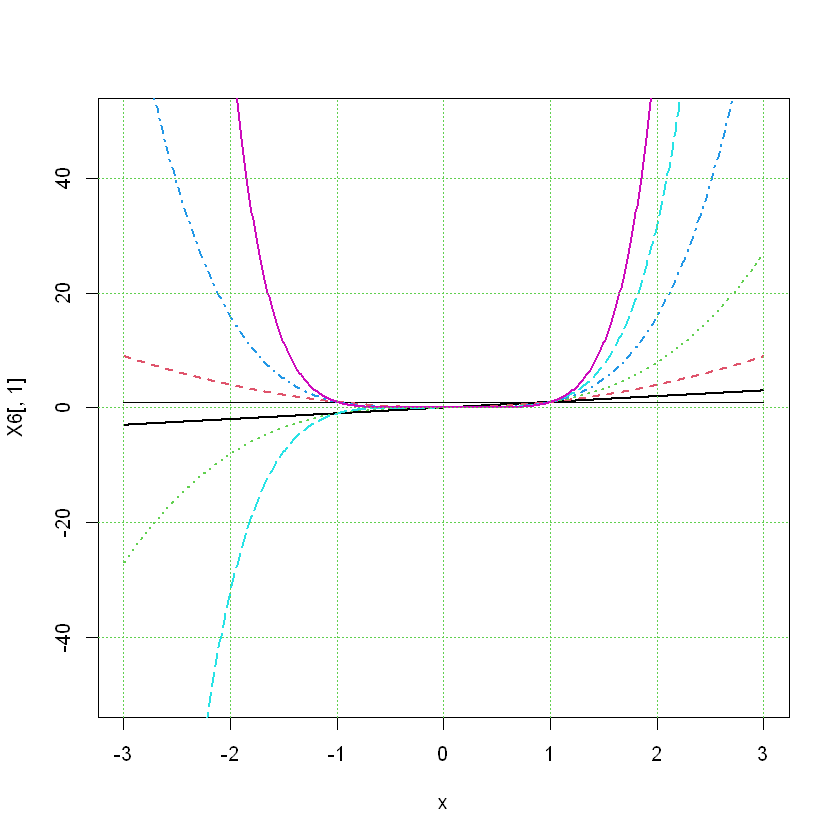

In [8]:
plot(x,X6[,1], type = 'l', ylim = c(-50,50))
matlines(x,X6[,2:7],lwd = 2)
grid(col = 3) #plotting the polynomials with degree 1,..,6

Compute also the correlation coefficients.
As you can see, even powers are correlated with each other and odd powers are also correlated with each other.

In [9]:
print(round(cor(X6[,2:7]),2)) 
#what can you say about the correlation?high?low? misfitting? if the features are correlated then what?==> multicollinearity ==>lead to numerical instability of fitting the model

          x I(x^2) I(x^3) I(x^4) I(x^5) I(x^6)
x      1.00   0.00   0.92   0.00   0.82   0.00
I(x^2) 0.00   1.00   0.00   0.96   0.00   0.90
I(x^3) 0.92   0.00   1.00   0.00   0.97   0.00
I(x^4) 0.00   0.96   0.00   1.00   0.00   0.98
I(x^5) 0.82   0.00   0.97   0.00   1.00   0.00
I(x^6) 0.00   0.90   0.00   0.98   0.00   1.00


By contrast, the basis function generated by poly() are not correlated at all.
They are "orthogonal polynomials".

In [10]:
print(round(cor(X6p[,2:7]),2))
#what do you notice? poly() invokes othogonal polynomials. 
#donot want linear combinations of features that create other features, we want it to be othonormal basis sets ~ linear Algebra

            poly(x, 6)1 poly(x, 6)2 poly(x, 6)3 poly(x, 6)4 poly(x, 6)5
poly(x, 6)1           1           0           0           0           0
poly(x, 6)2           0           1           0           0           0
poly(x, 6)3           0           0           1           0           0
poly(x, 6)4           0           0           0           1           0
poly(x, 6)5           0           0           0           0           1
poly(x, 6)6           0           0           0           0           0
            poly(x, 6)6
poly(x, 6)1           0
poly(x, 6)2           0
poly(x, 6)3           0
poly(x, 6)4           0
poly(x, 6)5           0
poly(x, 6)6           1


The basis functions x, x^2, ... also have less desirable numerical properties.
In the matrix formulation of linear regression, the following matrix and its inverse appear:

In [11]:
A = t(X6)%*%X6 #X^TX (XtransposeX) %*% - matrix multiplication
B = solve(A) #matrix inverse

Then A*B should be the identity matrix.
Let's compute the product and check how this differs from the identity matrix:

In [12]:
max(abs(A%*%B -diag(rep(1,7)))) #this should be 0 if it is equal to the identity matrix

[1] 1.136868e-13

This should really be much smaller. However, for this particular problem, it does not cause trouble.

Now plot the orthogonal basis functions generated by poly().

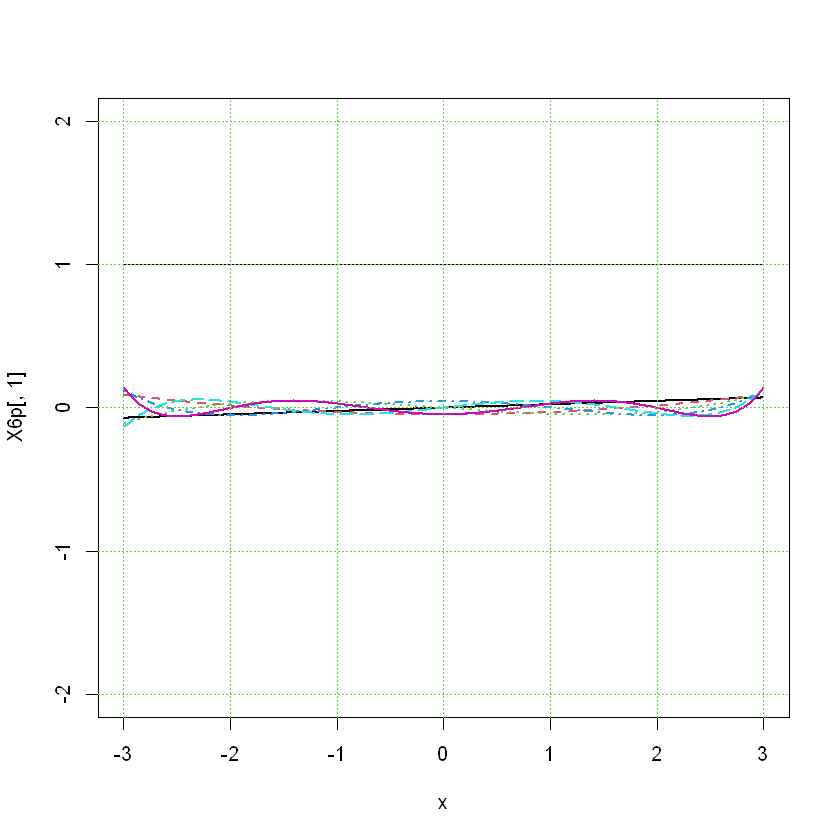

In [13]:
plot(x,X6p[,1], type = 'l', ylim = c(-2,2))
matlines(x,X6p[,2:7],lwd = 2)
grid(col = 3)

All basis functions are much more similar in magnitude.
Zoom in:

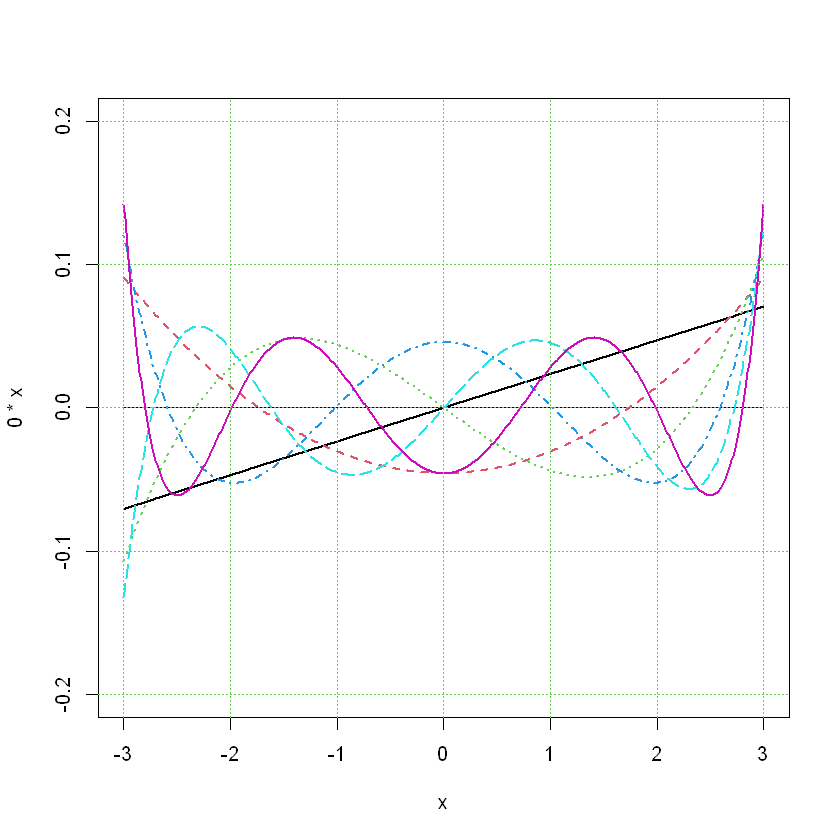

In [14]:
plot(x,0*x,ylim=c(-.2,.2), type = 'l')
matlines(x,X6p[,2:7],lwd = 2)
grid(col = 3) #6 polynomials
#othornormal basis set ==> much numerical stability for our model

These basis functions are  all uncorrelated. That is a consequence (and in fact essentially equivalent) to being orthogonal. 

In [15]:
print(round(cor(X6p[,2:7]),2))

            poly(x, 6)1 poly(x, 6)2 poly(x, 6)3 poly(x, 6)4 poly(x, 6)5
poly(x, 6)1           1           0           0           0           0
poly(x, 6)2           0           1           0           0           0
poly(x, 6)3           0           0           1           0           0
poly(x, 6)4           0           0           0           1           0
poly(x, 6)5           0           0           0           0           1
poly(x, 6)6           0           0           0           0           0
            poly(x, 6)6
poly(x, 6)1           0
poly(x, 6)2           0
poly(x, 6)3           0
poly(x, 6)4           0
poly(x, 6)5           0
poly(x, 6)6           1


Their numerical properties are also better.

In [16]:
A = t(X6p)%*%X6p
B = solve(A)
max(abs(A%*%B -diag(rep(1,7)))) #should be close to 0

[1] 2.386227e-31

In [17]:
fit=lm(y ~ poly(x,6))
print(summary(fit)) #what do you notice? Which predictors are worth keeping in the model?remeber what the data looks like? does this makes sense?


Call:
lm(formula = y ~ poly(x, 6))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.17065 -0.32001  0.02725  0.30687  1.52792 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.04961    0.01936   2.562   0.0106 *  
poly(x, 6)1  -0.44555    0.47465  -0.939   0.3483    
poly(x, 6)2 -16.36986    0.47465 -34.489   <2e-16 ***
poly(x, 6)3  -0.38887    0.47465  -0.819   0.4129    
poly(x, 6)4   4.42777    0.47465   9.329   <2e-16 ***
poly(x, 6)5   0.86453    0.47465   1.821   0.0690 .  
poly(x, 6)6  -0.58912    0.47465  -1.241   0.2150    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4746 on 594 degrees of freedom
Multiple R-squared:  0.6835,	Adjusted R-squared:  0.6803 
F-statistic: 213.8 on 6 and 594 DF,  p-value: < 2.2e-16



### Example 1

We’ll use the Boston data set [in MASS package], for predicting the median house value (mdev), in Boston Suburbs, based on the predictor variable lstat (percentage of lower status of the population).

We’ll randomly split the data into training set (80% for building a predictive model) and test set (20% for evaluating the model). Make sure to set seed for reproducibility.

In [18]:
# Load the data
data("Boston", package = "MASS")
# Split the data into training and test set
set.seed(123)
training.samples <- Boston$medv %>%
  createDataPartition(p = 0.8, list = FALSE)
train.data  <- Boston[training.samples, ]
test.data <- Boston[-training.samples, ]

First, visualize the scatter plot of the medv vs lstat variables as follow:

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


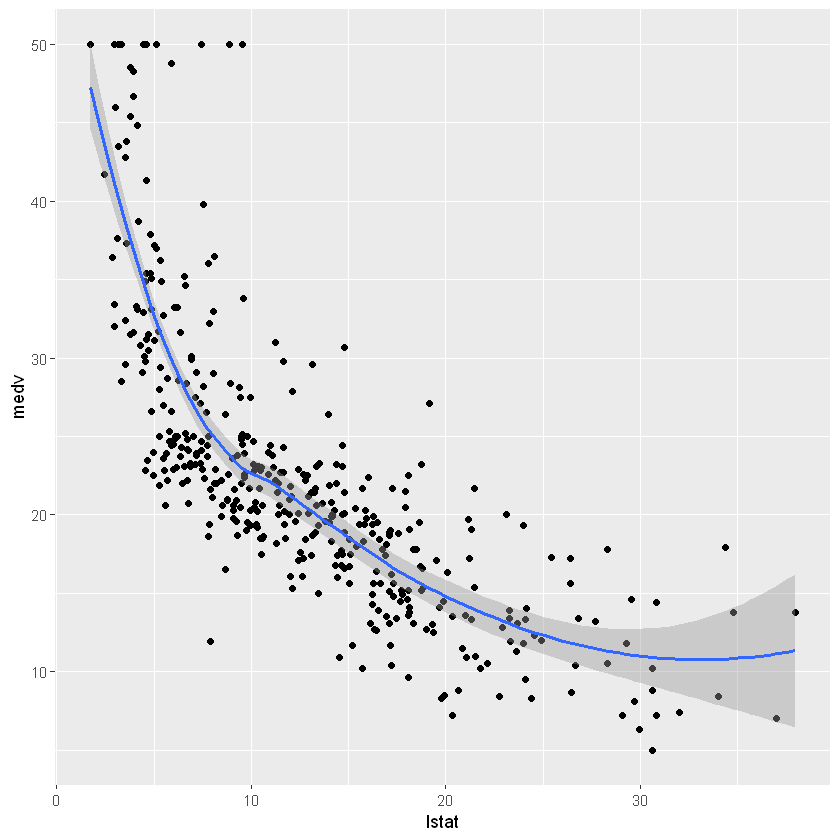

In [19]:
ggplot(train.data, aes(lstat, medv) ) +
  geom_point() +
  stat_smooth()

Let's compare the different models in order to choose the best one for our data.

The standard linear regression model equation can be written as medv = b0 + b1*lstat.

(a). Compute linear regression model:

In [20]:
# Build the model
model <- lm(medv ~ lstat, data = train.data)
# Make predictions
predictions <- model %>% predict(test.data)
# Model performance
print(data.frame(
  RMSE = RMSE(predictions, test.data$medv),
  R2 = R2(predictions, test.data$medv)
))

      RMSE       R2
1 6.503817 0.513163


Visualize the data:

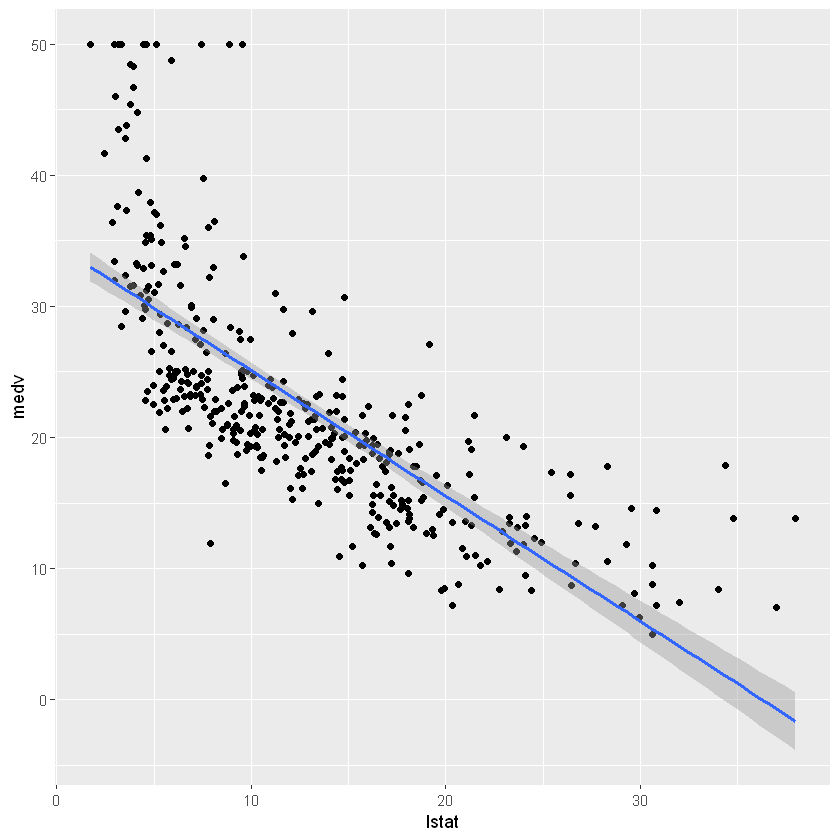

In [21]:
ggplot(train.data, aes(lstat, medv) ) +
  geom_point() +
  stat_smooth(method = lm, formula = y ~ x)

(b). Polynomial regression

The polynomial regression adds polynomial or quadratic terms to the regression equation as follow:

$medv=b0+b1*lstat+b2*lstat^2$

In R, to create a predictor x^2 you should use the function I(), as follow: I(x^2). This raise x to the power 2.

In [22]:
lm(medv ~ lstat + I(lstat^2), data = train.data)


Call:
lm(formula = medv ~ lstat + I(lstat^2), data = train.data)

Coefficients:
(Intercept)        lstat   I(lstat^2)  
    42.5736      -2.2673       0.0412  


An alternative simple solution is to use this:

In [23]:
lm(medv ~ poly(lstat, 2, raw = TRUE), data = train.data)


Call:
lm(formula = medv ~ poly(lstat, 2, raw = TRUE), data = train.data)

Coefficients:
                (Intercept)  poly(lstat, 2, raw = TRUE)1  
                    42.5736                      -2.2673  
poly(lstat, 2, raw = TRUE)2  
                     0.0412  


The output contains two coefficients associated with lstat : one for the linear term (lstat^1) and one for the quadratic term (lstat^2).

The following example computes a sixfth-order polynomial fit:

In [24]:
lm(medv ~ poly(lstat, 6, raw = TRUE), data = train.data) %>%
  summary()


Call:
lm(formula = medv ~ poly(lstat, 6, raw = TRUE), data = train.data)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.1962  -3.1527  -0.7655   2.0404  26.7661 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  7.788e+01  6.844e+00  11.379  < 2e-16 ***
poly(lstat, 6, raw = TRUE)1 -1.767e+01  3.569e+00  -4.952 1.08e-06 ***
poly(lstat, 6, raw = TRUE)2  2.417e+00  6.779e-01   3.566 0.000407 ***
poly(lstat, 6, raw = TRUE)3 -1.761e-01  6.105e-02  -2.885 0.004121 ** 
poly(lstat, 6, raw = TRUE)4  6.845e-03  2.799e-03   2.446 0.014883 *  
poly(lstat, 6, raw = TRUE)5 -1.343e-04  6.290e-05  -2.136 0.033323 *  
poly(lstat, 6, raw = TRUE)6  1.047e-06  5.481e-07   1.910 0.056910 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.188 on 400 degrees of freedom
Multiple R-squared:  0.6845,	Adjusted R-squared:  0.6798 
F-statistic: 144.6 on 6 and 400 DF,  p-value: < 2.2e-16


From the output above, it can be seen that polynomial terms beyond the fith order are not significant. So, just create a fith polynomial regression model as follow:

In [25]:
# Build the model
model <- lm(medv ~ poly(lstat, 5, raw = TRUE), data = train.data)
# Make predictions
predictions <- model %>% predict(test.data)
# Model performance
print(data.frame(
  RMSE = RMSE(predictions, test.data$medv),
  R2 = R2(predictions, test.data$medv)
))

      RMSE        R2
1 5.270374 0.6829474


Visualize the fith polynomial regression line as follow:

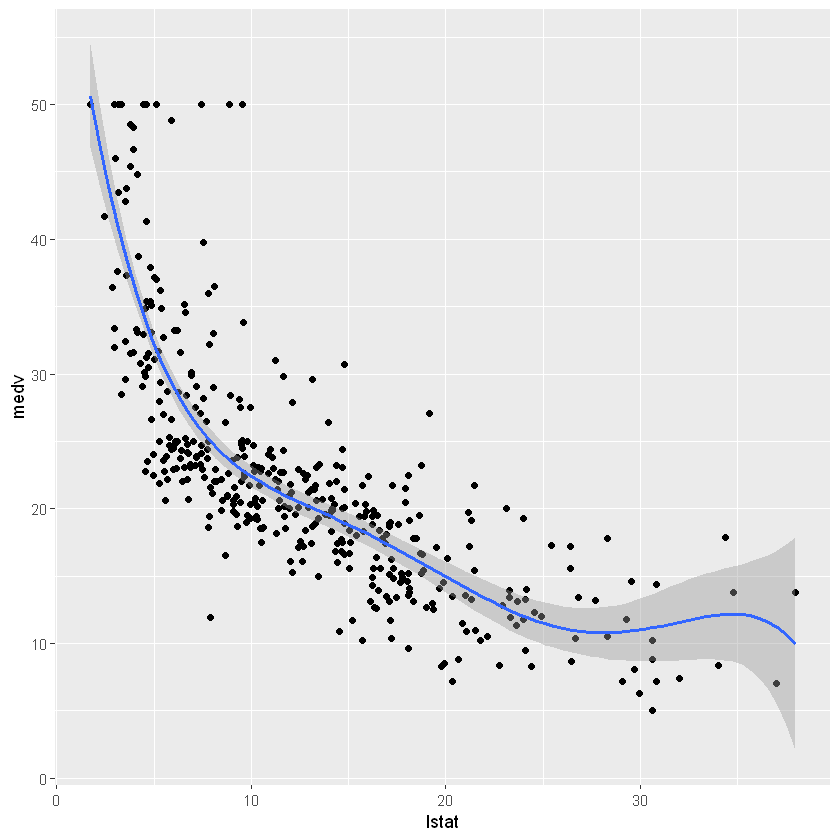

In [26]:
ggplot(train.data, aes(lstat, medv) ) +
  geom_point() +
  stat_smooth(method = lm, formula = y ~ poly(x, 5, raw = TRUE))

## Cubic Splines and Smoothing Splines

Cubic spline with fixed knots.

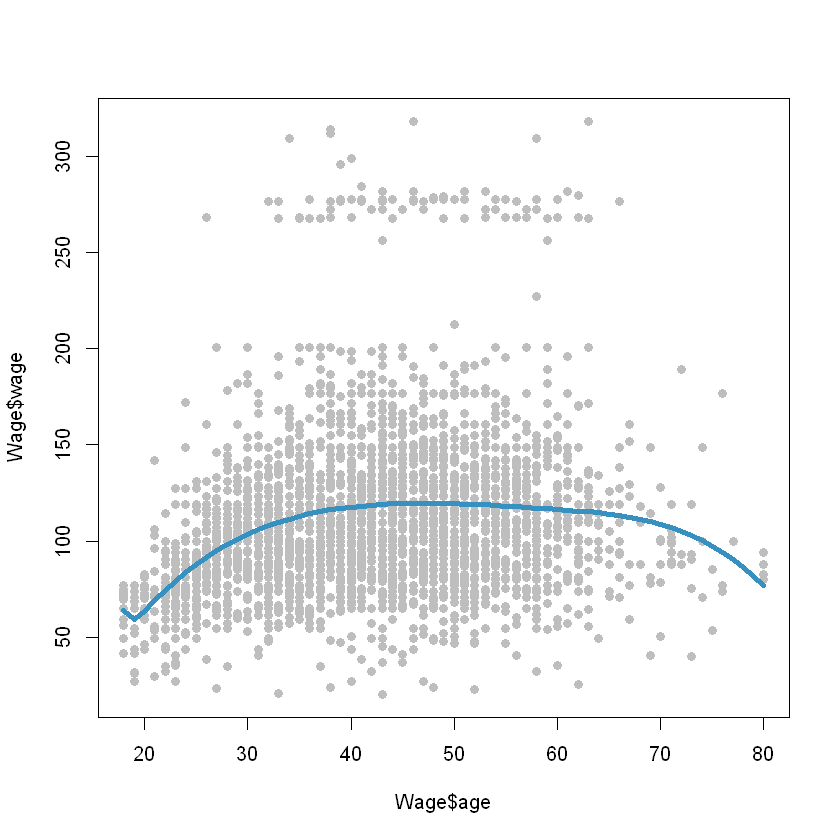

In [27]:
#library(splineDesign)
attach(Wage)
agelims=range(Wage$age)
age.grid=seq(from=agelims[1],to=agelims[2])
spline_fit <- lm(wage ~ bs(age, knots=c(20,40,60)), data=Wage) 

plot(Wage$age, Wage$wage, pch=19, col='grey')
pred = predict(spline_fit,list(age=age.grid), se=T)
lines(age.grid,pred$fit, col="#3690C0",lwd=4)

 A natural spline has better behavior at the boundary points.

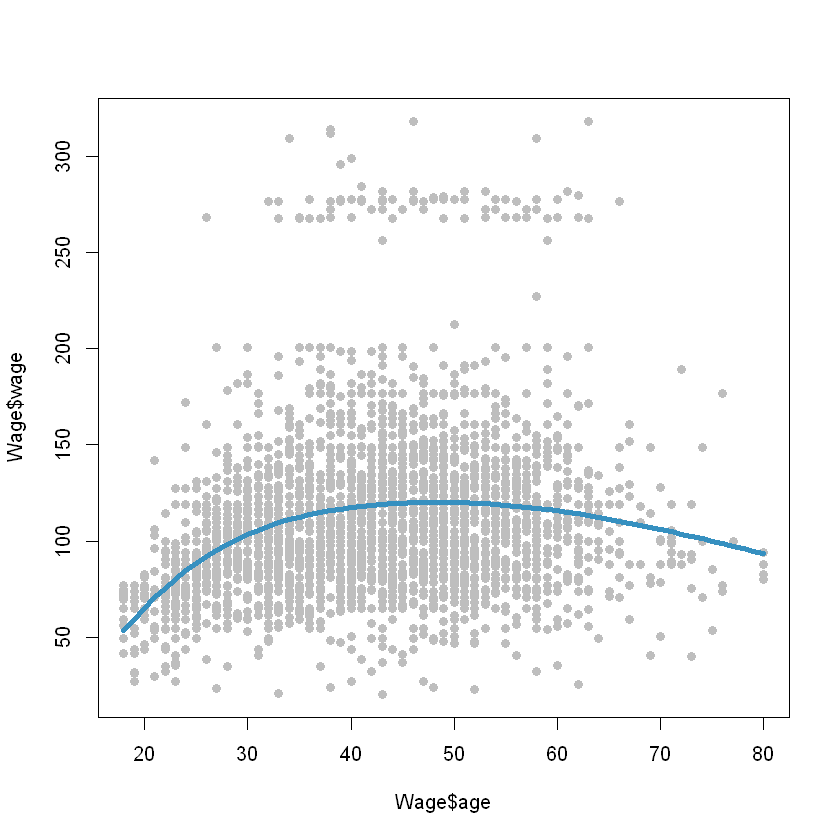

In [29]:
agelims=range(Wage$age)
age.grid=seq(from=agelims[1],to=agelims[2])

spline_fit <- lm(wage ~ ns(age, knots=c(20,40,60)), data=Wage)
plot(Wage$age, Wage$wage, pch=19, col='grey')
pred = predict(spline_fit,list(age=age.grid), se=T)
lines(age.grid,pred$fit, col="#3690C0",lwd=4)

A smoothing spline is a cubic spline with a knot at every observed $x$ but also a penalization to encourage smoothness.

Warning message in smooth.spline(Wage$age, Wage$wage, cv = TRUE):
"cross-validation with non-unique 'x' values seems doubtful"


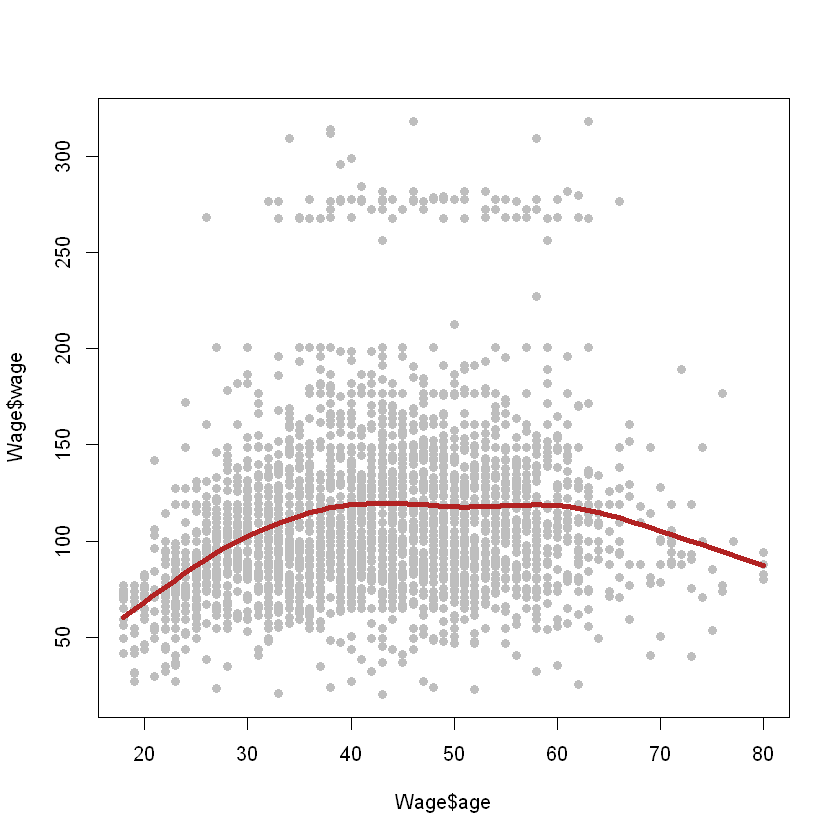

In [30]:
plot(Wage$age, Wage$wage, pch=19, col='grey')
ss_fit <- smooth.spline(Wage$age,Wage$wage,cv=TRUE) 
lines(ss_fit,col="firebrick", lwd=4)

### Example 2

For our previous example, we’ll place the knots at the lower quartile, the median quartile, and the upper quartile:

In [31]:
knots <- quantile(train.data$lstat, p = c(0.25, 0.5, 0.75))

We’ll create a model using a cubic spline (degree = 3):

In [32]:
# Build the model
knots <- quantile(train.data$lstat, p = c(0.25, 0.5, 0.75))
model <- lm (medv ~ bs(lstat, knots = knots), data = train.data)
# Make predictions
predictions <- model %>% predict(test.data)
# Model performance
print(data.frame(
  RMSE = RMSE(predictions, test.data$medv),
  R2 = R2(predictions, test.data$medv)
))

      RMSE        R2
1 5.317372 0.6786367


Note that, the coefficients for a spline term are not interpretable.

Visualize the cubic spline as follow:

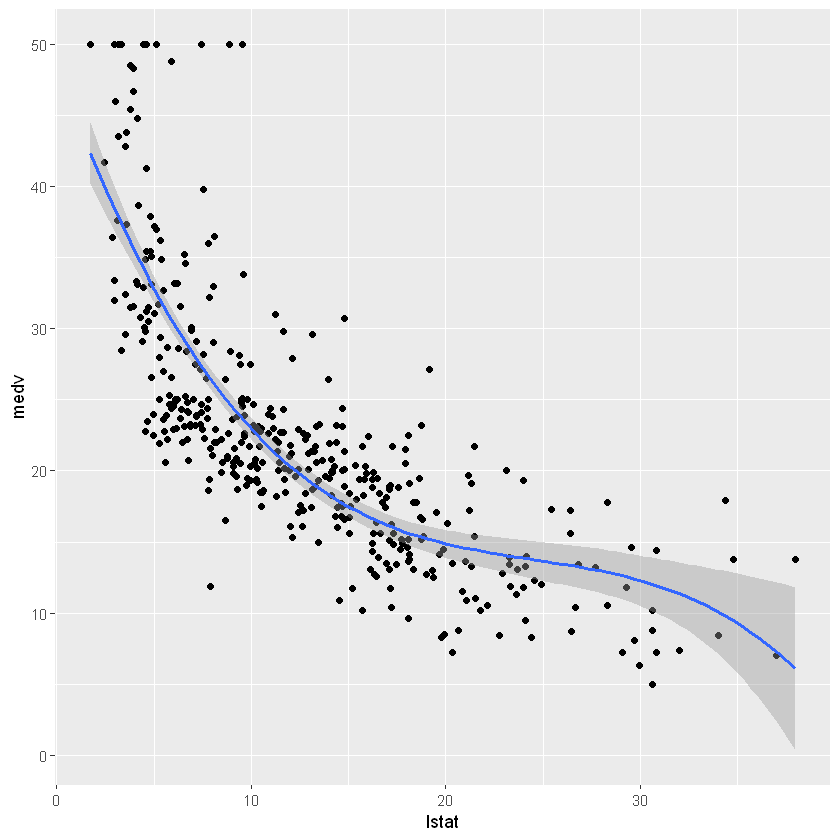

In [33]:
ggplot(train.data, aes(lstat, medv) ) +
  geom_point() +
  stat_smooth(method = lm, formula = y ~ splines::bs(x, df = 3))

## GAM 

In [34]:
# Build the model
model <- gam(medv ~ s(lstat), data = train.data)
# Make predictions
predictions <- model %>% predict(test.data)
# Model performance
print(data.frame(
  RMSE = RMSE(predictions, test.data$medv),
  R2 = R2(predictions, test.data$medv)
))

     RMSE        R2
1 5.42684 0.6610243


Warning message in newdata.predict.Gam(object, newdata, type, dispersion, se.fit, :
"No standard errors (currently) for gam predictions with newdata"
Warning message:
"Computation failed in `stat_smooth()`
Caused by error in `pred$fit`:
! $ operator is invalid for atomic vectors"


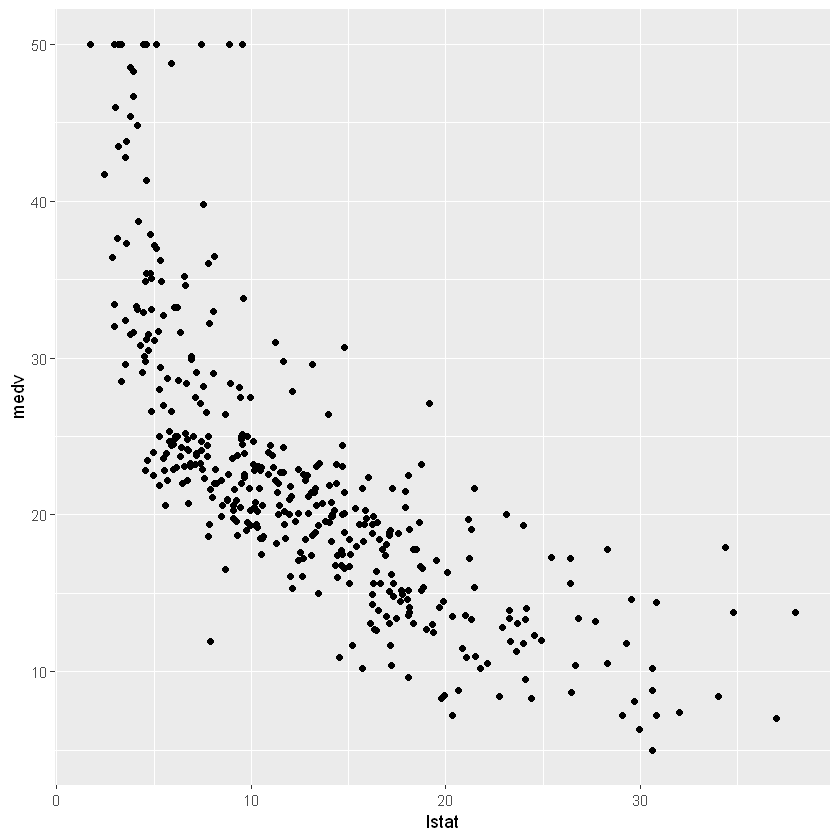

In [35]:
ggplot(train.data, aes(lstat, medv) ) +
  geom_point() +
  stat_smooth(method = gam, formula = y ~ s(x))

From analyzing the RMSE and the R2 metrics of the different models, it can be seen that the polynomial regression, the spline regression and the generalized additive models outperform the linear regression model and the log transformation approaches.

### From the book


Call: gam(formula = wage ~ s(year, 4) + s(age, 5) + education, data = Wage)
Deviance Residuals:
    Min      1Q  Median      3Q     Max 
-119.43  -19.70   -3.33   14.17  213.48 

(Dispersion Parameter for gaussian family taken to be 1235.69)

    Null Deviance: 5222086 on 2999 degrees of freedom
Residual Deviance: 3689770 on 2986 degrees of freedom
AIC: 29887.75 

Number of Local Scoring Iterations: NA 

Anova for Parametric Effects
             Df  Sum Sq Mean Sq F value    Pr(>F)    
s(year, 4)    1   27162   27162  21.981 2.877e-06 ***
s(age, 5)     1  195338  195338 158.081 < 2.2e-16 ***
education     4 1069726  267432 216.423 < 2.2e-16 ***
Residuals  2986 3689770    1236                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Anova for Nonparametric Effects
            Npar Df Npar F  Pr(F)    
(Intercept)                          
s(year, 4)        3  1.086 0.3537    
s(age, 5)         4 32.380 <2e-16 ***
education                            
--

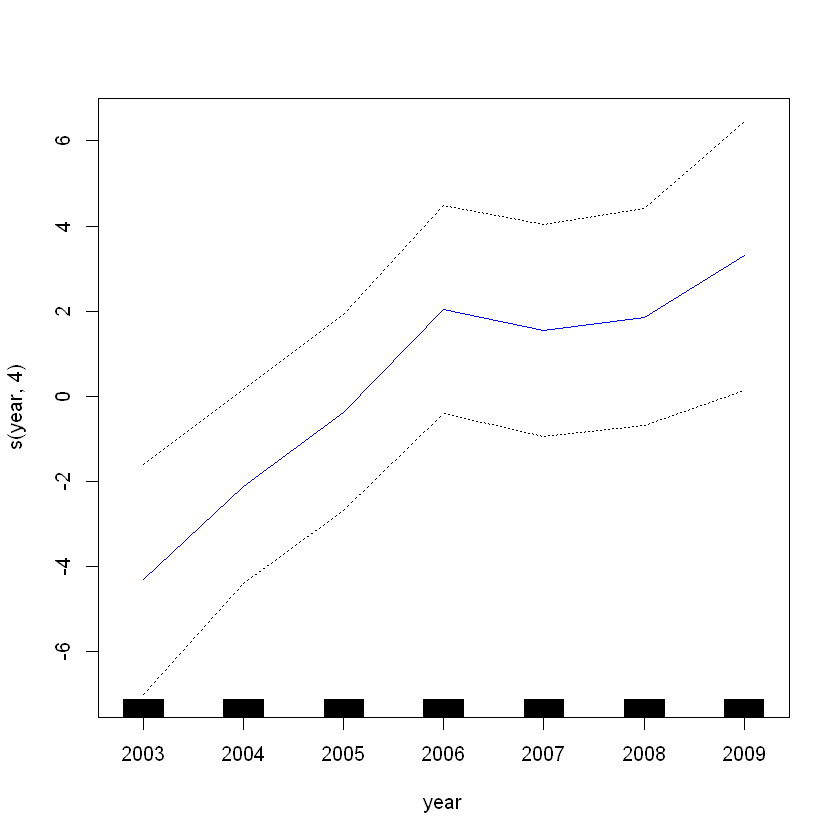

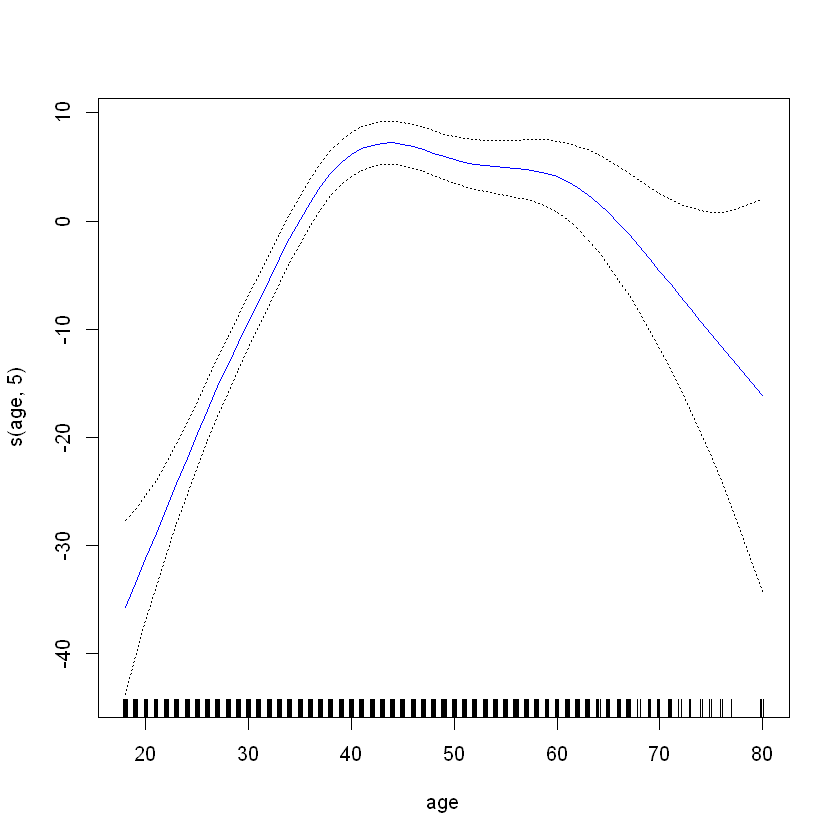

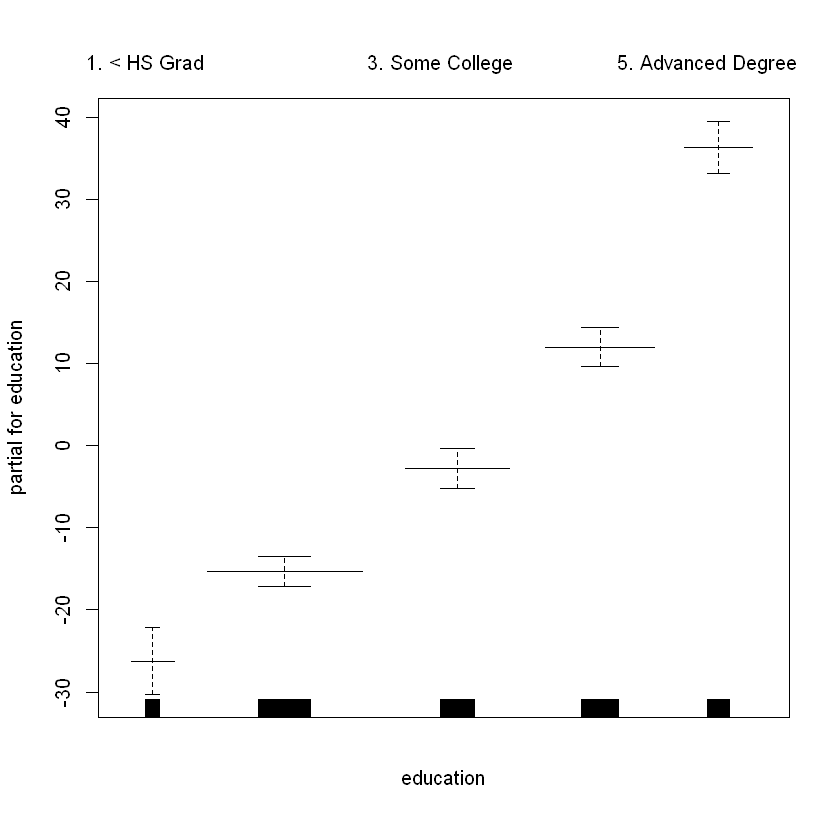

In [36]:
gam1=lm(wage~ns(year,4)+ns(age,5)+education,data=Wage)

gam.m3=gam(wage~s(year,4)+s(age,5)+education,data=Wage)

summary(gam.m3)

plot(gam.m3, se=TRUE,col="blue")

Analysis of Deviance Table

Model 1: wage ~ s(age, 5) + education
Model 2: wage ~ year + s(age, 5) + education
Model 3: wage ~ s(year, 4) + s(age, 5) + education
  Resid. Df Resid. Dev Df Deviance       F    Pr(>F)    
1      2990    3711731                                  
2      2989    3693842  1  17889.2 14.4771 0.0001447 ***
3      2986    3689770  3   4071.1  1.0982 0.3485661    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


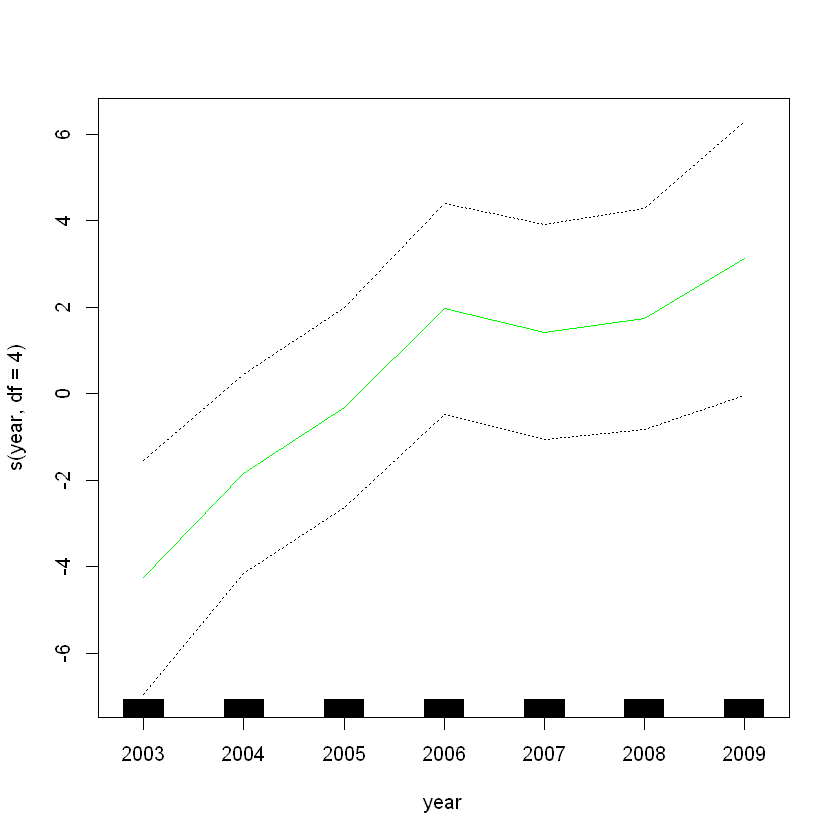

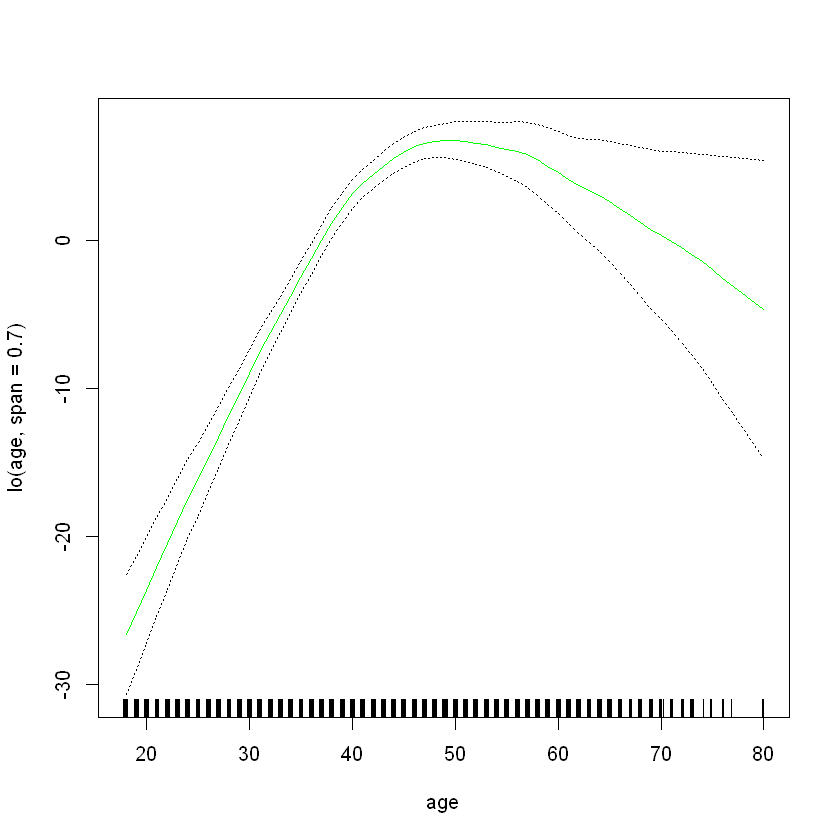

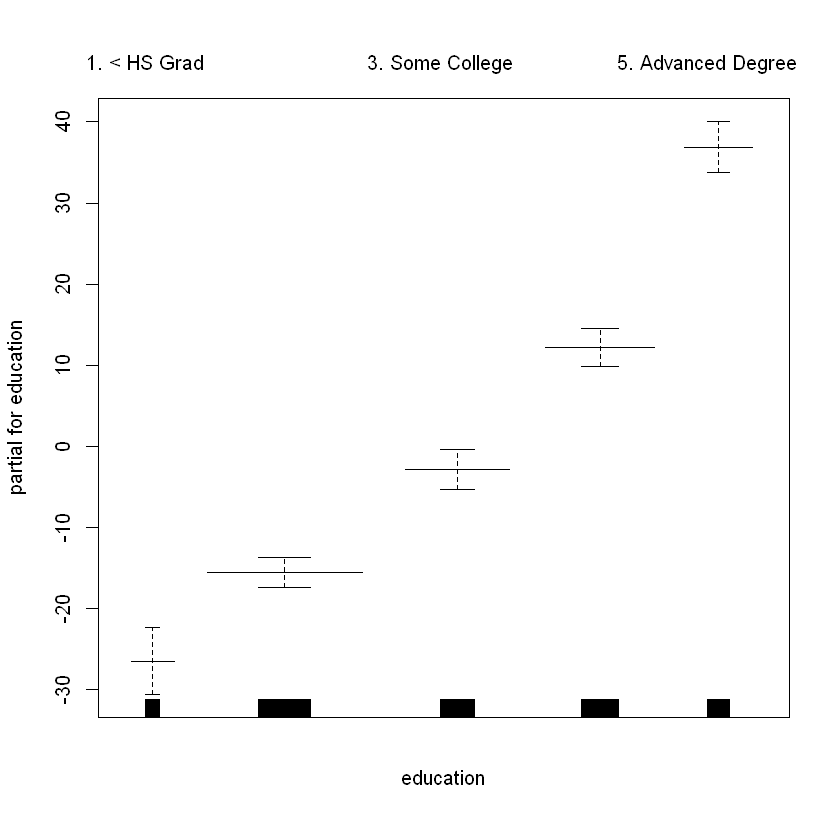

In [37]:
gam.m1=gam(wage~s(age,5)+education,data=Wage)
gam.m2=gam(wage~year+s(age,5)+education,data=Wage)
gam.m3=gam(wage~s(year,4)+s(age,5)+education,data=Wage)
print(anova(gam.m1,gam.m2,gam.m3,test="F"))

preds=predict(gam.m2,newdata=Wage)

gam.lo=gam(wage~s(year,df=4)+lo(age,span=0.7)+education,data=Wage)
plot(gam.lo, se=TRUE, col="green")

## LOESS

Warning message:
"package 'dslabs' was built under R version 4.2.2"
Warning message:
"`qplot()` was deprecated in ggplot2 3.4.0."


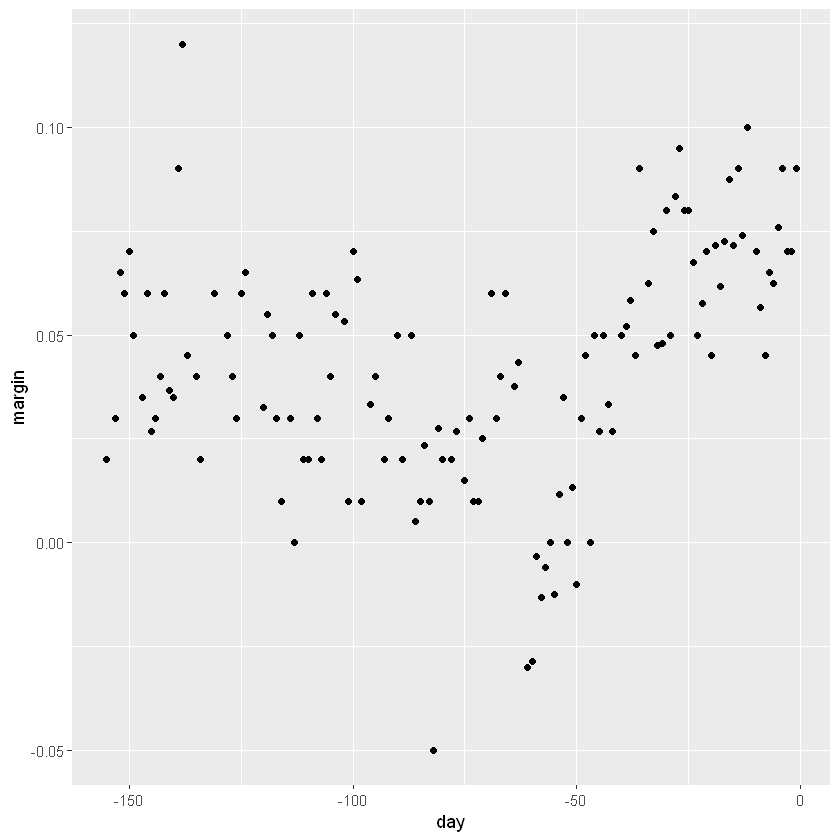

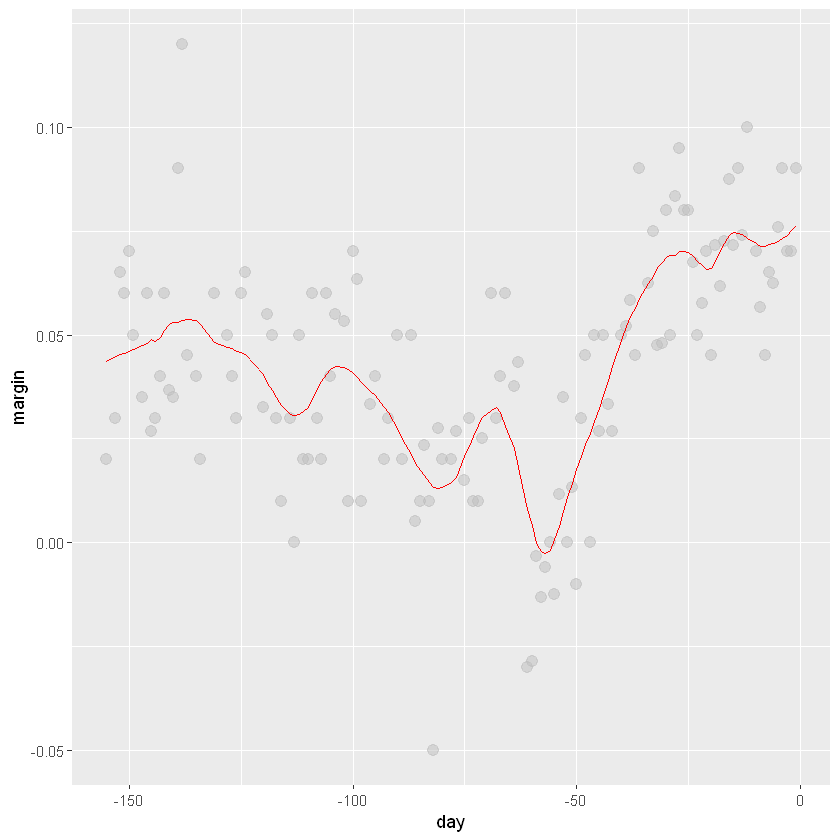

In [40]:
library(tidyverse)
library(dslabs)
library(caret)

data("polls_2008")
qplot(day, margin, data = polls_2008)
total_days <- diff(range(polls_2008$day))
span <- 21/total_days

fit <- loess(margin ~ day, degree=1, span = span, data=polls_2008)

polls_2008 %>% mutate(smooth = fit$fitted) %>%
  ggplot(aes(day, margin)) +
  geom_point(size = 3, alpha = .5, color = "grey") +
  geom_line(aes(day, smooth), color="red")

### From the book

The following objects are masked from Wage (pos = 4):

    age, education, health, health_ins, jobclass, logwage, maritl,
    race, region, wage, year




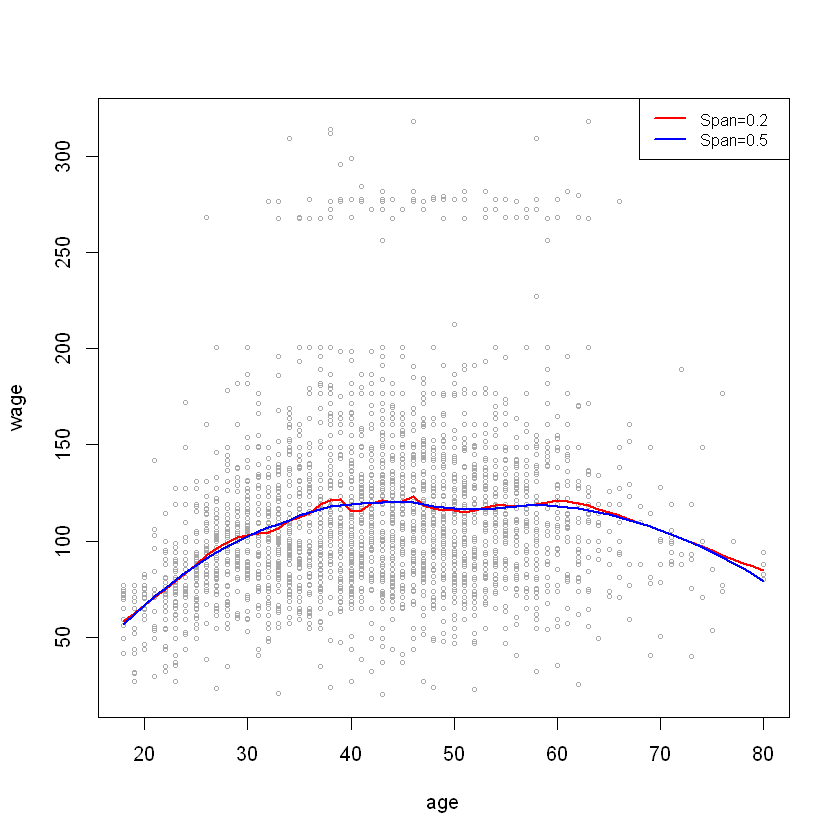

In [41]:
attach(Wage)
plot(age,wage,xlim=agelims ,cex=.5,col="darkgrey")
fit=loess(wage~age,span=.2,data=Wage)
fit2=loess(wage~age,span=.5,data=Wage)
lines(age.grid,predict(fit,data.frame(age=age.grid)),col="red",lwd=2)
lines(age.grid,predict(fit2,data.frame(age=age.grid)),col="blue",lwd=2)
legend("topright",legend=c("Span=0.2","Span=0.5"),col=c("red","blue"),lty=1,lwd=2,cex=.8)

# Part-2: Lab-Assignment


## Question-1: 

Please write a paragraph about what you can conclude from this example (i.e. final Conclusions).  

### S&P Data: Discuss this with your group members 

We will working with the weekly S&P500 data.

In [42]:
print(names(Weekly))
print(head(Weekly))
attach(Weekly) #time series data

[1] "Year"      "Lag1"      "Lag2"      "Lag3"      "Lag4"      "Lag5"     
[7] "Volume"    "Today"     "Direction"
  Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today Direction
1 1990  0.816  1.572 -3.936 -0.229 -3.484 0.1549760 -0.270      Down
2 1990 -0.270  0.816  1.572 -3.936 -0.229 0.1485740 -2.576      Down
3 1990 -2.576 -0.270  0.816  1.572 -3.936 0.1598375  3.514        Up
4 1990  3.514 -2.576 -0.270  0.816  1.572 0.1616300  0.712        Up
5 1990  0.712  3.514 -2.576 -0.270  0.816 0.1537280  1.178        Up
6 1990  1.178  0.712  3.514 -2.576 -0.270 0.1544440 -1.372      Down


We want to predict weekly Volume from performance in previous weeks. 

Make an additive model that uses polynomial regression for each of the predictors.


Call: gam(formula = Volume ~ poly(Lag1, 3) + poly(Lag2, 3) + poly(Lag3, 
    3))
Deviance Residuals:
    Min      1Q  Median      3Q     Max 
-3.5228 -1.0298 -0.6724  0.6498  7.8760 

(Dispersion Parameter for gaussian family taken to be 2.4057)

    Null Deviance: 3095.08 on 1088 degrees of freedom
Residual Deviance: 2595.744 on 1079 degrees of freedom
AIC: 4058.368 

Number of Local Scoring Iterations: 2 

Anova for Parametric Effects
                Df  Sum Sq Mean Sq F value    Pr(>F)    
poly(Lag1, 3)    3  275.25  91.749  38.139 < 2.2e-16 ***
poly(Lag2, 3)    3  132.33  44.109  18.335 1.317e-11 ***
poly(Lag3, 3)    3   91.76  30.587  12.714 3.604e-08 ***
Residuals     1079 2595.74   2.406                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


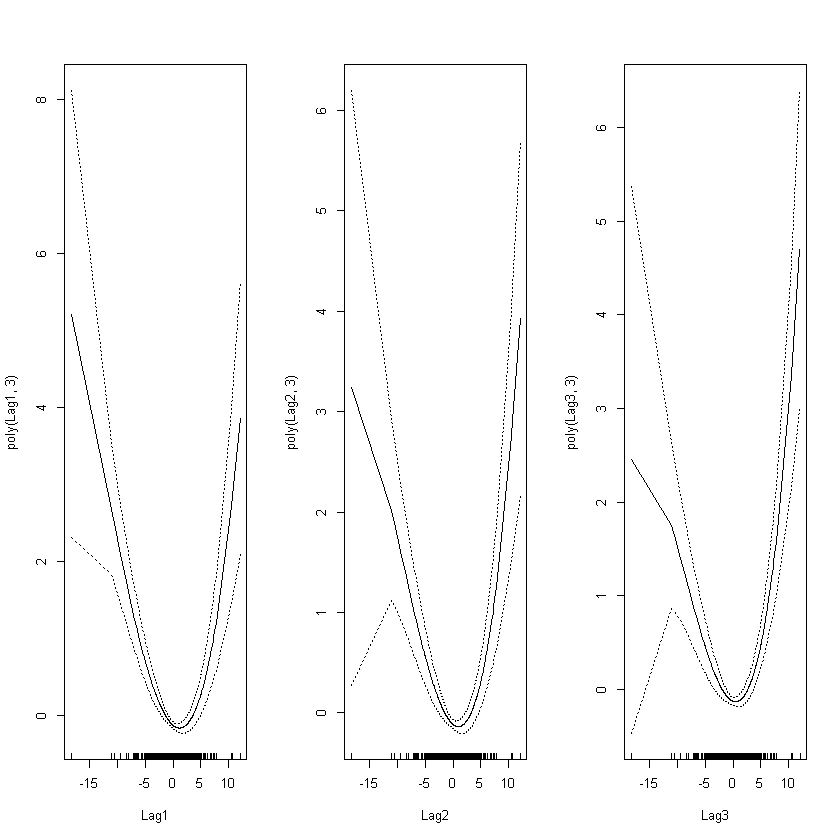

In [43]:
library(gam)
fit4 = gam(Volume ~ poly(Lag1,3 ) + poly(Lag2,3 ) + poly(Lag3,3 )) #polynomials of lag features
summary(fit4)
par(mfrow=c(1,3)) #to partition the Plotting Window
plot(fit4,se = TRUE)

Plot the data and the fits. 

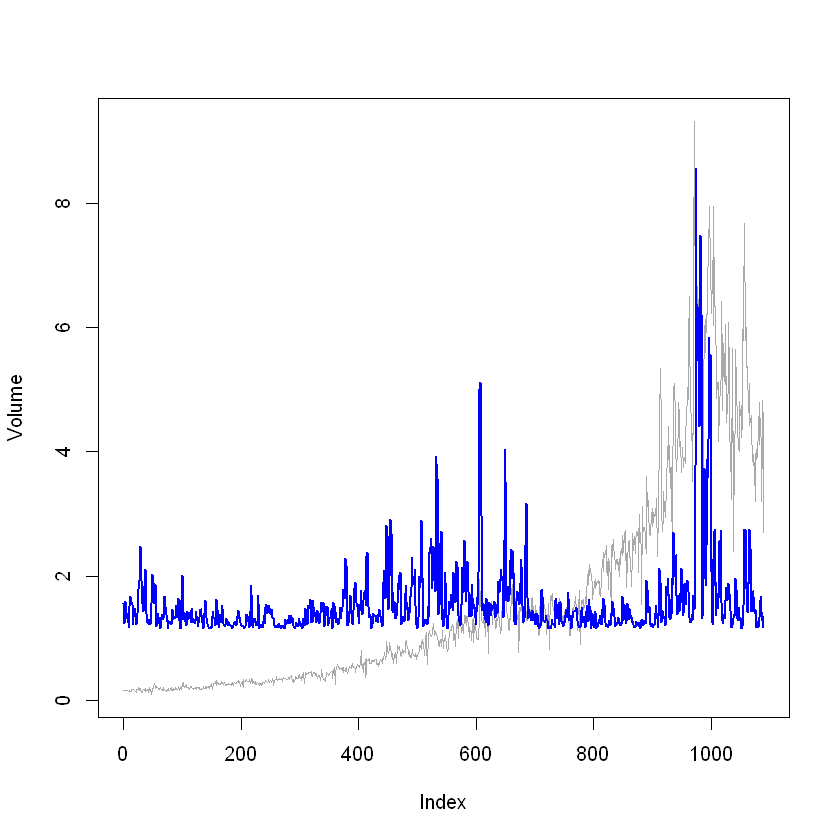

In [44]:
plot(Volume,col="darkgrey",type="l")
preds.Weekly=predict(fit4,se=TRUE)
lines(preds.Weekly$fit,lwd=2,col="blue") #need to treat this as time series data

Clearly the fits have nothing to do with the data. It is essential to include time in the fit. Also, the exponential increase of the trading volume suggests that one should look at the log of the volume.

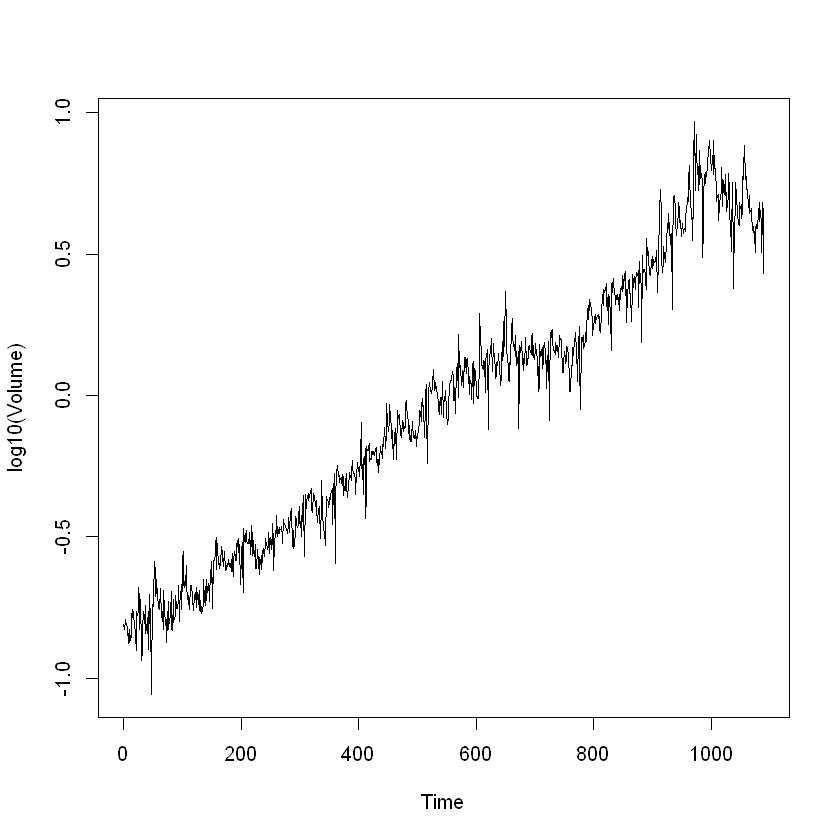

In [45]:
plot.ts(log10(Volume), type="l")

There is a general linear trend, the magnitude of the variation is about the same for all years, there are deviations from the linear trend around the years 2002 and 2008, and there may be seasonal variation. 


### Smoothing splines

 We can use smoothing splines to summarize these data. For very large penalty parameters $\lambda$ or equivalently $df = 2$, a smoothing spline is essentially a straight line. We'll make such a smoothing spline, compute predictions, and plot it. Choosing a large lambda is equivalent to using two degrees of freedom (two parameters are fitted).

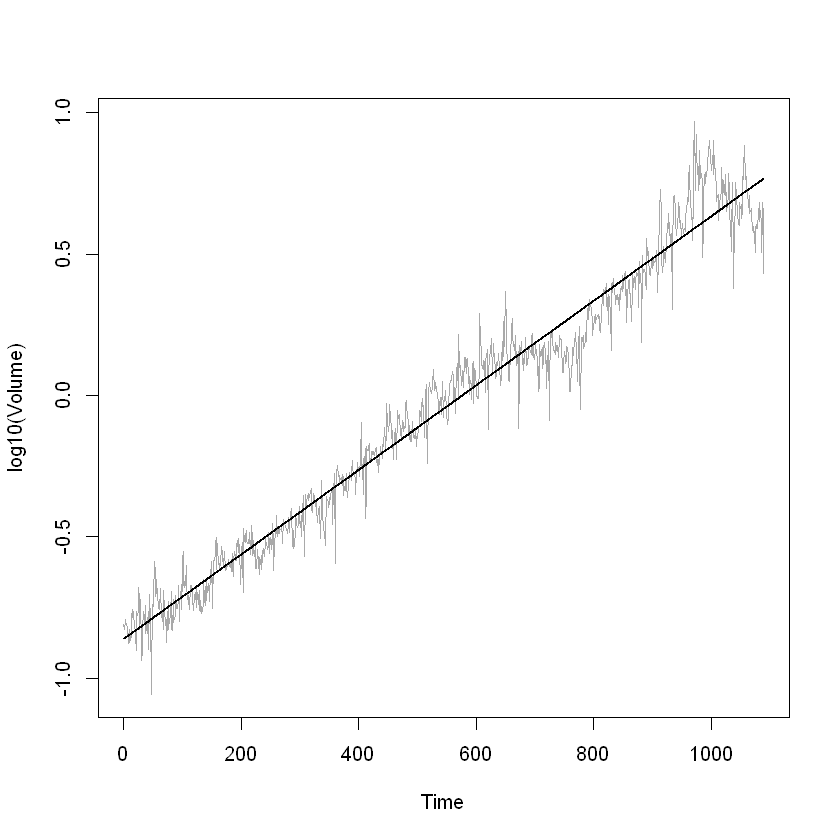

In [51]:
fit.s1 = smooth.spline(log10(Volume) ~  1:1089, df = 2) #constraint or flexible with df=2? linear?
preds.s1 = predict(fit.s1)
plot.ts(log10(Volume), col = "darkgrey")
lines(preds.s1$y, lwd =2 ) #high bias?low bias?

To capture year-to-year variation, increase the number of degrees of freedom. Let's use one df per year, plus one for the intercept. This is plotted in red.

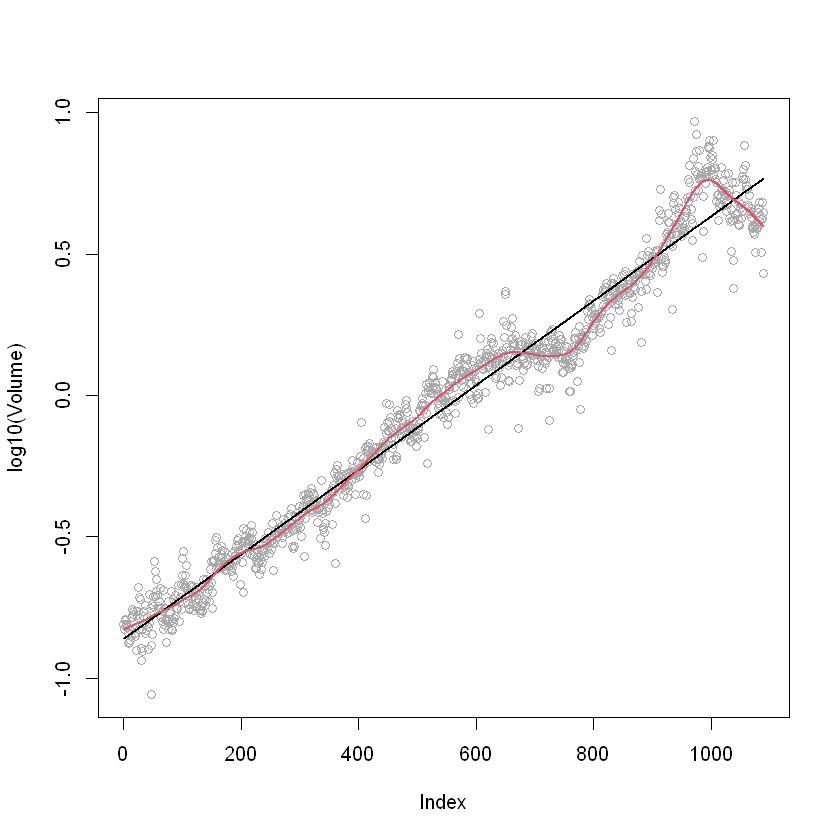

In [48]:
fit.s1 = smooth.spline(log10(Volume) ~  1:1089, df = 2)
preds.s1 = predict(fit.s1)
fit.s22 = smooth.spline(log10(Volume) ~  1:1089, df = 22)
preds.s22 = predict(fit.s22)

plot(log10(Volume), col = "darkgrey")
lines(preds.s1$y, lwd =2 )
lines(preds.s22$y, lwd =2, col = 2)

To capture also seasonal variation, increase the number of degrees of freedom further. We use four df per year, plus one for the intercept. This is plotted in blue.

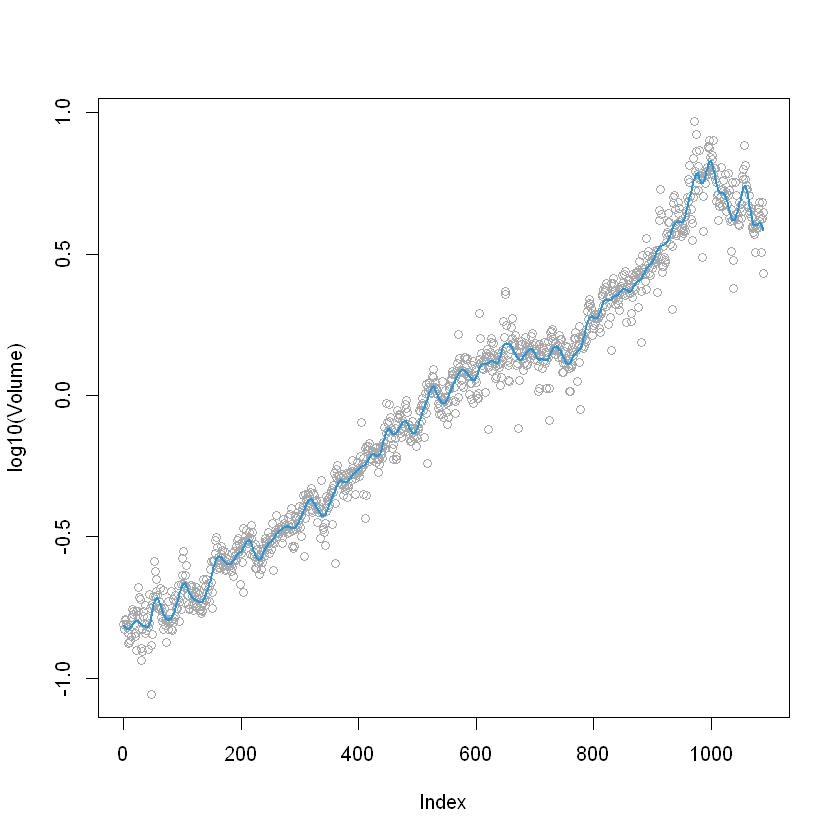

In [49]:
fit.s85 = smooth.spline(log10(Volume) ~  1:1089, df = 85)
preds.s85 = predict(fit.s85)

plot(log10(Volume), col = "darkgrey")
lines(preds.s85$y, lwd =2, col = 4) #what can you say about the overall market trend?

When the number of degrees of freedom is not specified, \texttt{gam} chooses one. Here is the resulting plot. This fit uses about 120 degrees of freedom.

Call:
smooth.spline(x = log10(Volume) ~ 1:1089)

Smoothing Parameter  spar= 0.1833952  lambda= 3.62849e-08 (12 iterations)
Equivalent Degrees of Freedom (Df): 120.1739
Penalized Criterion (RSS): 2.895513
GCV: 0.0033594

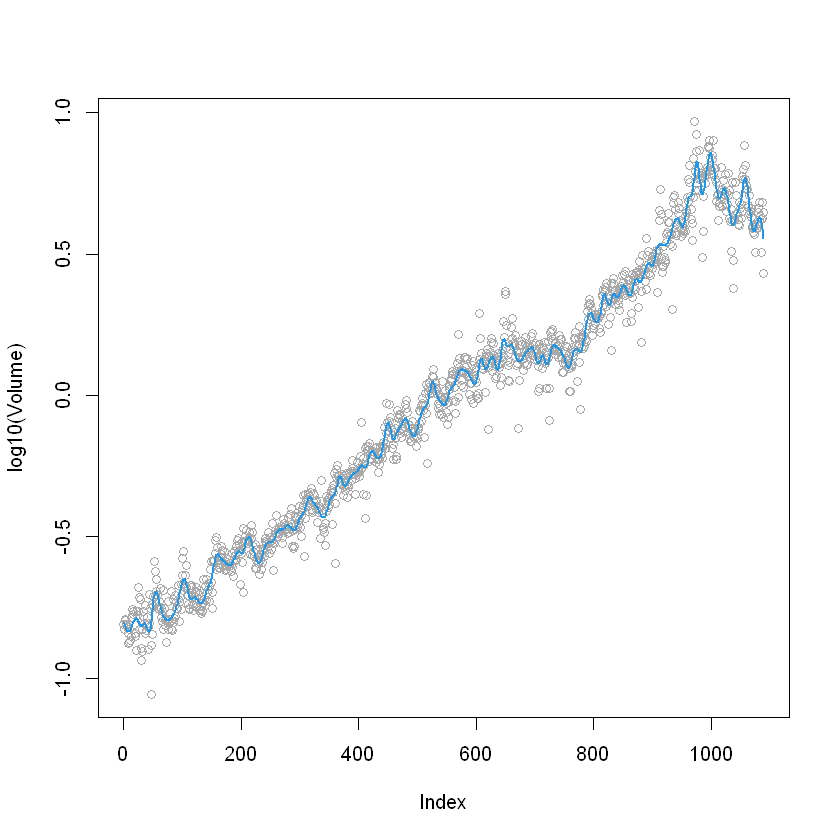

In [50]:
fit.s = smooth.spline(log10(Volume) ~  1:1089)
preds.s = predict(fit.s)

plot(log10(Volume), col = "darkgrey")
lines(preds.s$y, lwd =2, col = 4)
fit.s

### Solution: 

We saw that it is hard to predict time series data with no time elements, which is why the intial gam trying to predict volume did not work. Once we shifted to using time indices and smoothing splines, the example basically showed how we can tune the sensitivtiy of splines using degrees of freedom. The more degrees of freedom the more parameters the spline has available to it to effectively map the data. With 2 df's ther is only an intercept and a slope term leading to a straight line, but as we add more the line gets more "wiggly" and the fit improves.



## Question-2
This question relates to the College data set.

(a) Split the data into a training set and a test set. Using out-of-state tuition as the response and the other variables as the predictors, perform forward stepwise selection on the training set in order to identify a satisfactory model that uses just a subset of the predictors. Plot the BIC to pick the best model (cross validation could also be used).


In [57]:
data(College)

indexes <- College$Outstate %>%
  createDataPartition(p = 0.8, list = FALSE)
train <- College[indexes,]
test <- College[!1:nrow(College) %in% indexes,]


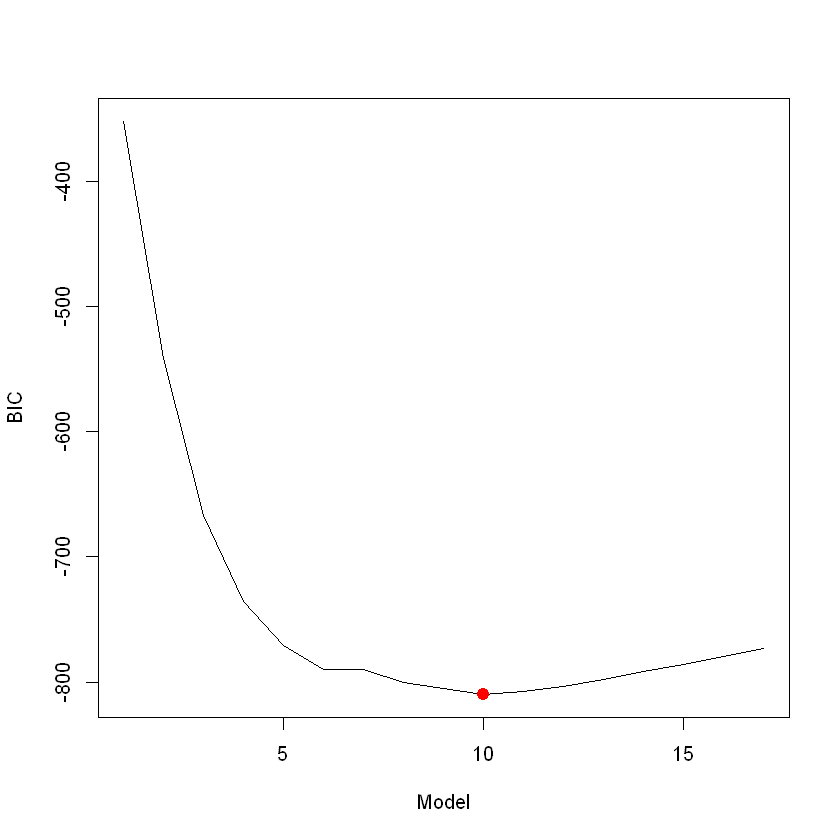

In [114]:
## Best Subset Selection
library(leaps)
regfit.full=regsubsets(Outstate~.,data = train,nvmax= 18)
reg.summary=summary(regfit.full)
plot(reg.summary$bic,xlab="Model",ylab="BIC",type="l")

m=which.min(reg.summary$bic)
points(m,reg.summary$bic[m], col="red",cex=2,pch = 20)

In [115]:
## Best Model
coef(regfit.full,m)

(Intercept)    PrivateYes          Apps        Accept     Top10perc 
-3664.8862220  2258.0632260    -0.3182534     0.8154264    25.3979306 
  F.Undergrad    Room.Board      Terminal   perc.alumni        Expend 
   -0.1971667     1.0314267    35.3515338    47.2181507     0.1924734 
    Grad.Rate 
   24.1419314


(b) Fit a GAM on the training data, using out-of-state tuition as the response and the features selected in the previous step as the predictors. Plot the results, and explain your findings.



Call: gam(formula = Outstate ~ Private + s(Apps) + s(Accept) + s(Top10perc) + 
    s(F.Undergrad) + s(Room.Board) + s(Terminal) + s(perc.alumni) + 
    s(Expend) + s(Grad.Rate), data = train)
Deviance Residuals:
     Min       1Q   Median       3Q      Max 
-6425.14 -1075.62    75.25  1139.68  8429.02 

(Dispersion Parameter for gaussian family taken to be 3365668)

    Null Deviance: 10165086291 on 622 degrees of freedom
Residual Deviance: 1968915861 on 585 degrees of freedom
AIC: 11169.94 

Number of Local Scoring Iterations: NA 

Anova for Parametric Effects
                Df     Sum Sq    Mean Sq F value    Pr(>F)    
Private          1 2713722601 2713722601 806.295 < 2.2e-16 ***
s(Apps)          1  946196846  946196846 281.132 < 2.2e-16 ***
s(Accept)        1   76859931   76859931  22.837 2.234e-06 ***
s(Top10perc)     1  861184829  861184829 255.873 < 2.2e-16 ***
s(F.Undergrad)   1  451942123  451942123 134.280 < 2.2e-16 ***
s(Room.Board)    1  745423318  745423318 221.479 < 2.

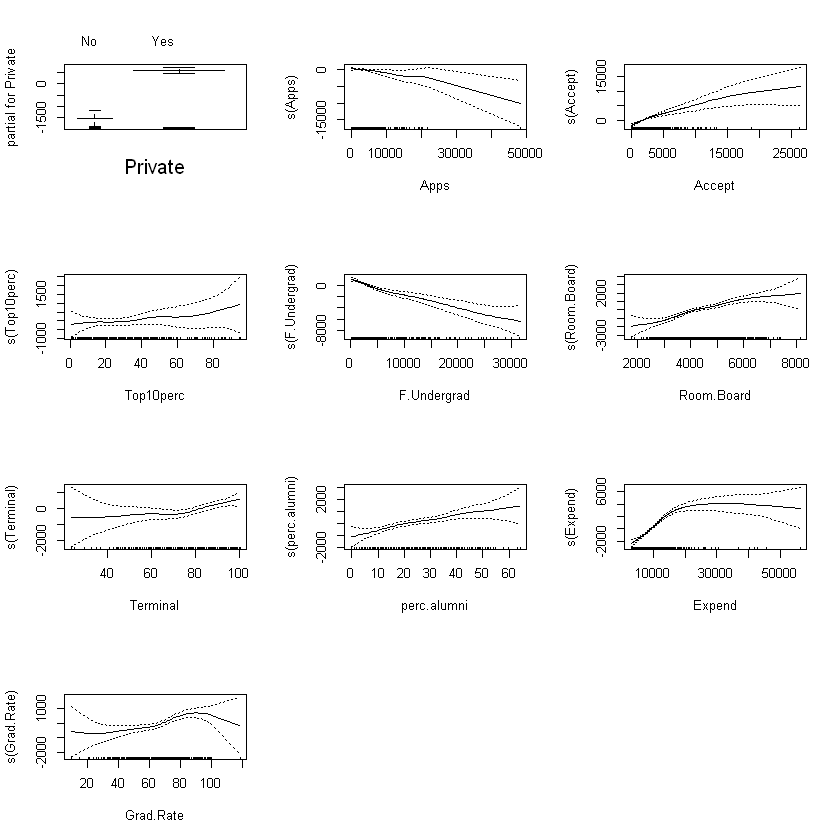

In [108]:
mod <- gam(Outstate ~ Private + s(Apps) + s(Accept) + s(Top10perc) + s(F.Undergrad) + s(Room.Board) + s(Terminal) + s(perc.alumni) + s(Expend) + s(Grad.Rate), data = train)
summary(mod)
par(mfrow = c(4,3))
plot(mod,se = TRUE)


In the results plots we can see the relationship between each predictor and the response variable. Each of these variables were fitted with a smoothing spline that allowed for a better prediction and the dotted lines are measure of standard error on the fits. The tighter the dotted lines are to each other, the more confident the fit in that range. Based on the results we can see that all these variables are significant and most show a non-linear relationship with the response variable.


(c) Evaluate the model obtained on the test set, and explain the results obtained.


[1] "RMSE: 1678.96845861579"

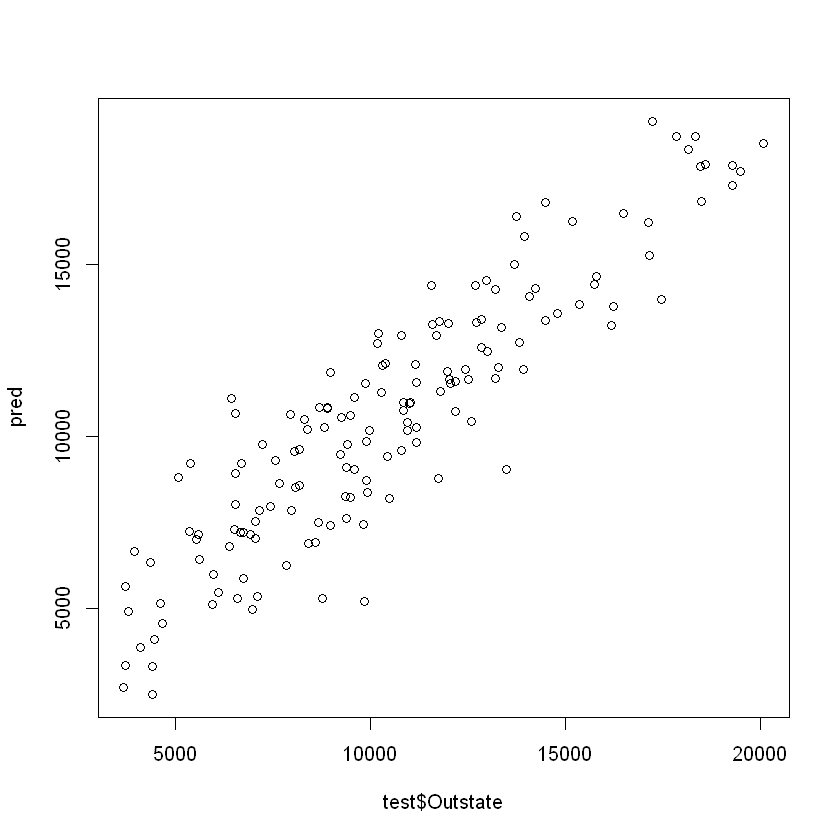

In [110]:
pred <- predict(mod, newdata = test)
rmse <- sqrt(mean((pred - test$Outstate)**2))
paste("RMSE:", rmse)
plot(test$Outstate, pred)

The results are quite good, with the model having an average error of about $1678 on Out of state tuition values. The plot of the results shows the strong positive correlation and gives confidence that the model performs quite well.


(d) For which variables, if any, is there evidence of a non-linear relationship with the response? (make scatterplots of the response against the five numerical predictors.)


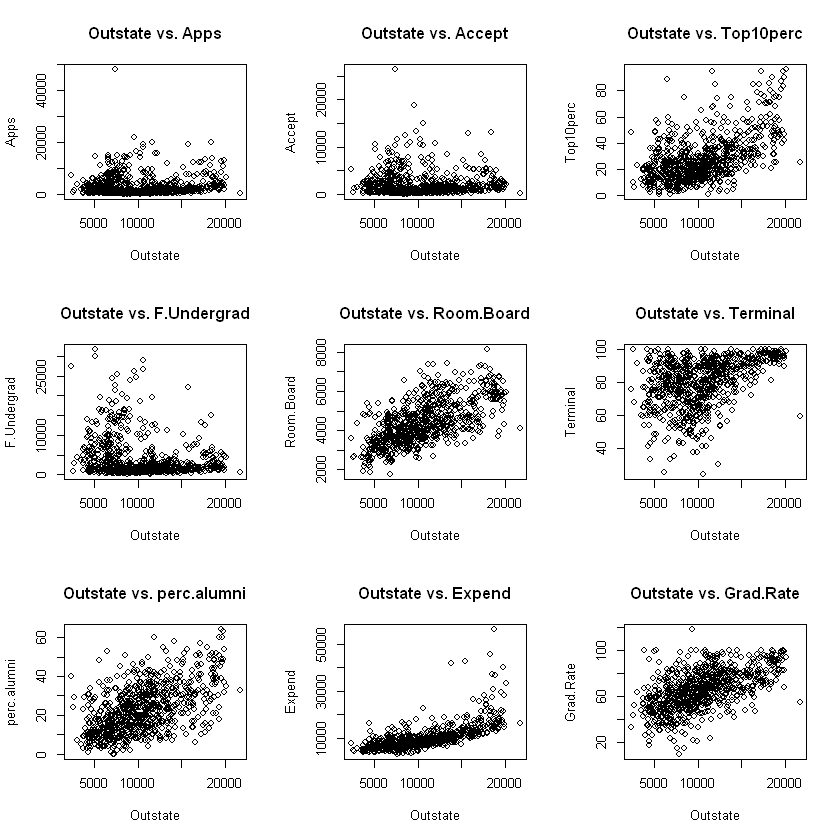

In [116]:
numeric_pred <- c('Apps', 'Accept', 'Top10perc', 'F.Undergrad', 'Room.Board', 'Terminal', 'perc.alumni', 'Expend', 'Grad.Rate')
par(mfrow = c(3,3))
for (i in numeric_pred){
    plot(College[, 'Outstate'], College[, i], main = paste("Outstate vs.", i), xlab = "Outstate", ylab = i)
}

There is evidence of a clear non-linear relationship between Outstate and Apps, Accept, Top10perc, F.Undergrad, Terminal, and Expend. The variables perc.alumni, Grad.Rate, and Room.Board appear to be relatively linearly related to Outstate. Given this knowledge, using a gam as opposed to a glm was the right move for modeling this data.